In [26]:
# 把一些警告的訊息暫時関掉
import warnings
warnings.filterwarnings('ignore')

# Utilities相關函式庫
import os
import numpy as np
import codecs

# 使用"結巴(jieba)來進行分析
import jieba.analyse

# 圖像處理/展現的相關函式庫
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [27]:
# 專案的根目錄路徑
ROOT_DIR = os.getcwd()

# 訓練/驗證用的資料目錄
DATASET_PATH = os.path.join(ROOT_DIR, "dataset")

# 模型資料目錄
MODEL_PATH = os.path.join(ROOT_DIR, "model")
JIEBA_DICTFILE_PATH = os.path.join(MODEL_PATH,"extra_dict", "dict.txt.big")

# 中文字型目錄
FONT_PATH = os.path.join(ROOT_DIR, "fonts")
FONT_FILE_PATH = os.path.join(FONT_PATH, "NotoSansCJKtc-Black.otf")

In [31]:
# 設定繁體中文字典
jieba.set_dictionary(JIEBA_DICTFILE_PATH)

# 將"乾杯"這首歌的關鍵字詞取出來 
# topK代表要取的前幾大的關鍵字 

song_lyrics = os.path.join(DATASET_PATH, "cat.txt")

with open(song_lyrics, "rb") as f:
    for line in f:
        tags = jieba.analyse.extract_tags(line,topK=100, withWeight=True)
        for tag, weight in tags:
            print(tag + "," + str(int(weight * 10000)))

Building prefix dict from /home/letitgo/jacky/lyrics_application/model/extra_dict/dict.txt.big ...
Loading model from cache /tmp/jieba.u112558f732abb287cd7d8addb556a737.cache
Loading model cost 1.282 seconds.
Prefix dict has been built succesfully.


我們,7152
貓叫,7152
一起,6246
撒個,4087
心臟,4087
愛我,4087
砰砰,3491
迷戀,3065
我要,3065
變成,3065
的貓,3065
賴在,3065
懷裡,3065
貪戀,3065
想要,2953
外套,2361
有時候,2043
脾氣,2043
張牙舞爪,2043
總是,2043
溫柔,2043
當你,2043
小貓貓,2043
每天,1988
面前,1882
味道,1880
融化,1435
身上,1359
戀上你,1021
擁抱,1021
好時,1021
每分,951
迷你,852
女主角,832
每秒,768
珍惜,743
不好,484
需要,371
重要,342
知道,339
就是,307


In [29]:
with open("dataset/cat.txt", "r") as wf:
    for word in wf:
        words = jieba.cut(word)
        print("原歌詞(未斷詞):")
        print(word)
        print("--------------------------------------------------------------------------------------------------------------------")
        print("原歌詞(有斷詞):")
        print(" ".join(words))

原歌詞(未斷詞):
我們一起學貓叫 一起喵喵喵喵喵 在你面前撒個嬌 哎呦喵喵喵喵喵 我的心臟砰砰跳 迷你戀上你的壞笑 你不說愛我我就喵喵喵 每天都需要你的擁抱 珍惜在一起的每分每秒 你對我多重要 我想你比我更知道 你就是我的女主角 有時候我懶的像隻貓 脾氣 好時又張牙舞爪 你總是溫柔的 能把我的心融化掉 我想要當你的小貓貓  我們一起學貓叫 一起喵喵喵喵喵 在你面前撒個嬌 哎呦喵喵喵喵喵 我的心臟砰砰跳 迷戀上你的壞笑 你不說愛我我就喵喵喵  我們一起學貓叫 一起喵喵喵喵喵 我要穿你的外套  你身上的味道 想要變成你的貓 賴在你懷裡睡著 每天都貪戀著你的好  有時候我懶的像隻貓 脾氣不好時又張牙舞爪 你總是溫柔的 能把我的心融化掉 我想要當你的小貓貓 我們一起學貓叫 一起喵喵喵喵喵 在你面前撒個嬌 哎呦喵喵喵喵喵 我的心臟砰砰跳 迷戀上你的壞笑 你不說愛我我就喵喵喵 我們一起學貓叫 一起喵喵喵喵喵 我要穿你的外套 聞你身上的味道 想要變成你的貓 賴在你懷裡睡著 每天都貪戀著你的好 我們一起學貓叫 一起喵喵喵喵喵 在你面前撒個嬌 哎呦喵喵喵喵喵 我的心臟砰砰跳 迷戀上你的壞笑 你不說愛我我就喵喵喵 我們一起學貓叫 一起喵喵喵喵喵 我要穿你的外套 聞你身上的味道 想要變成你的貓 賴在你懷裡睡著 每天都貪戀著你的好

--------------------------------------------------------------------------------------------------------------------
原歌詞(有斷詞):
我們 一起 學 貓叫   一起 喵 喵 喵 喵 喵   在 你 面前 撒個 嬌   哎 呦 喵 喵 喵 喵 喵   我 的 心臟 砰砰 跳   迷你 戀上你 的 壞 笑   你 不 說 愛我 我 就 喵 喵 喵   每天 都 需要 你 的 擁抱   珍惜 在 一起 的 每分 每秒   你 對 我 多 重要   我 想 你 比 我 更 知道   你 就是 我 的 女主角   有時候 我 懶 的 像 隻 貓   脾氣   好時 又 張牙舞爪   你 總是 溫柔 的   能 把 我 的 心 融化 掉   我 想要 當你 的 小貓貓     我們 一起 學 貓叫   一起 喵 喵 喵 喵 喵   在 你 面前 撒個 

In [32]:
# 演唱會歌單出現的 33 首歌詞
all_songs_lyrics = os.path.join(DATASET_PATH, "cat.txt")

#每首歌的前10大tags的集合
all_songs_top10_tags = [] 

with open(all_songs_lyrics, "r", encoding='utf8') as f1:
    for line in f1:
        words = jieba.analyse.extract_tags(line,10) #取10個tags
        all_songs_top10_tags.extend(words) # 把tags存放起來
f1.close()

# 串接所有歌的前10大tags成一長字串
all_songs_top10_tags_text = " ".join(all_songs_top10_tags)

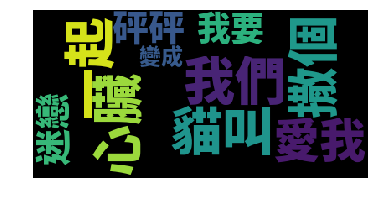

<Figure size 1000x600 with 0 Axes>

In [33]:
# 產生文字雲
wc = WordCloud(font_path="fonts/NotoSansCJKtc-Black.otf", #設置字體
               background_color="black", #背景顏色
               max_words = 2000 ,        #文字雲顯示最大詞數
               stopwords=stopwords)      #停用字詞

wc.generate(all_songs_top10_tags_text)

# 視覺化呈現
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(10,6), dpi = 100)
plt.show()

In [37]:
import jieba
ret = open("dataset/cat.txt", "r").read()
seglist = jieba.cut(ret, cut_all=False)
print("精確模式: " + "/ ".join(seglist))  # 精確模式

精確模式: 我們/ 一起/ 學/ 貓叫/  / 一起/ 喵/ 喵/ 喵/ 喵/ 喵/  / 在/ 你/ 面前/ 撒個/ 嬌/  / 哎/ 呦/ 喵/ 喵/ 喵/ 喵/ 喵/  / 我/ 的/ 心臟/ 砰砰/ 跳/  / 迷你/ 戀上你/ 的/ 壞/ 笑/  / 你/ 不/ 說/ 愛我/ 我/ 就/ 喵/ 喵/ 喵/  / 每天/ 都/ 需要/ 你/ 的/ 擁抱/  / 珍惜/ 在/ 一起/ 的/ 每分/ 每秒/  / 你/ 對/ 我/ 多/ 重要/  / 我/ 想/ 你/ 比/ 我/ 更/ 知道/  / 你/ 就是/ 我/ 的/ 女主角/  / 有時候/ 我/ 懶/ 的/ 像/ 隻/ 貓/  / 脾氣/  / 好時/ 又/ 張牙舞爪/  / 你/ 總是/ 溫柔/ 的/  / 能/ 把/ 我/ 的/ 心/ 融化/ 掉/  / 我/ 想要/ 當你/ 的/ 小貓貓/  /  / 我們/ 一起/ 學/ 貓叫/  / 一起/ 喵/ 喵/ 喵/ 喵/ 喵/  / 在/ 你/ 面前/ 撒個/ 嬌/  / 哎/ 呦/ 喵/ 喵/ 喵/ 喵/ 喵/  / 我/ 的/ 心臟/ 砰砰/ 跳/  / 迷戀/ 上/ 你/ 的/ 壞/ 笑/  / 你/ 不/ 說/ 愛我/ 我/ 就/ 喵/ 喵/ 喵/  /  / 我們/ 一起/ 學/ 貓叫/  / 一起/ 喵/ 喵/ 喵/ 喵/ 喵/  / 我要/ 穿/ 你/ 的/ 外套/  /  / 你/ 身上/ 的/ 味道/  / 想要/ 變成/ 你/ 的貓/  / 賴在/ 你/ 懷裡/ 睡/ 著/  / 每天/ 都/ 貪戀/ 著/ 你/ 的/ 好/  /  / 有時候/ 我/ 懶/ 的/ 像/ 隻/ 貓/  / 脾氣/ 不好/ 時/ 又/ 張牙舞爪/  / 你/ 總是/ 溫柔/ 的/  / 能/ 把/ 我/ 的/ 心/ 融化/ 掉/  / 我/ 想要/ 當你/ 的/ 小貓貓/  / 我們/ 一起/ 學/ 貓叫/  / 一起/ 喵/ 喵/ 喵/ 喵/ 喵/  / 在/ 你/ 面前/ 撒個/ 嬌/  / 哎/ 呦/ 喵/ 喵/ 喵/ 喵/ 喵/  / 我/ 的/ 心臟/ 砰砰/ 跳/  / 迷戀/ 上/ 你/ 的/ 壞/ 笑/  / 你/ 不/ 說/ 愛我/ 我/ 就/ 喵/ 喵/ 喵/  / 我們/ 一起/ 學/ 貓叫/  / 一起/ 喵/ 喵/ 喵/ 